In [1]:
import pandas as pd
titanic = pd.read_csv("../datasets/titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

When looking at the data and data types:

* PassengerID and Name cannot be used effectively in learning a general model
* Survived is the target value so we will pull that out for any actual modeling.
* We know from the documentation that Pclass is a categorical variable, so it should be treated differently from numerical variables. We will transform it into a string for the time being.

In [3]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [4]:
titanic.isna().describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,1,1,1,1,1,2,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,True,False
freq,891,891,891,891,891,714,891,891,891,891,687,889


From here we can see the unique values (True or False) and their frequencies. If "count" == "freq", then all of the values equal the "top". For example, there are 891 PassengerIDs where the top category is False at a frequency of 891. This means all of the values are False, so there are no NaNs. 

We can see that Age, Cabin, and Embarked have missing values. Most of Age and Embarked are not NaNs, so these features are salvagable. Most of Cabin is missing though with about 3/4 of that column missing. It would be safer to just drop the column. 

In [5]:
titanic = titanic.drop(['PassengerId','Cabin','Name','Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


/tmp/ipykernel_134145/1375827447.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr())


<AxesSubplot: >

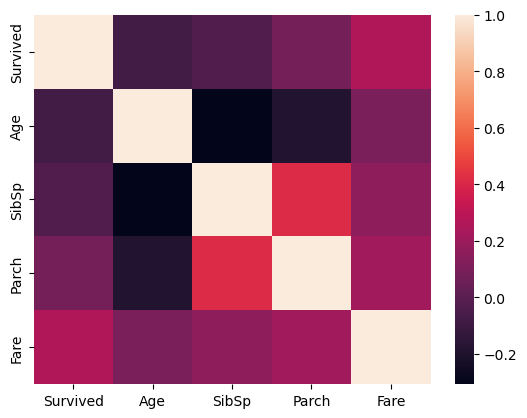

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(titanic.corr())

In [11]:
titanic.corr()

/tmp/ipykernel_134145/2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


We can tell from the correlation matrices that the strongest numerical correlation with Survived is Fare. With the others near 0, they may not have a tremendous amount of effect on the model, but they will be kept in due to little features. 

In [ ]:
titanic.to_csv('titanic_')